In [1]:
import cv2
import tensorflow as tf
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [23]:
from tensorflow.keras.models import save_model

In [2]:
emnist_dir = '/Users/pushpakumar/Downloads/emnist'
emnist_data = scipy.io.loadmat('emnist-byclass.mat')

In [3]:
x_train = emnist_data['dataset']['train'][0, 0]['images'][0, 0]
y_train = emnist_data['dataset']['train'][0, 0]['labels'][0, 0]
x_test = emnist_data['dataset']['test'][0, 0]['images'][0, 0]
y_test = emnist_data['dataset']['test'][0, 0]['labels'][0, 0]

In [4]:
x_train_ini = x_train.reshape(-1,28 , 28, 1)
x_test_ini = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_train_ini])
x_test = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_test_ini])

In [6]:
print(x_train.shape)

(697932, 28, 28, 1)


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

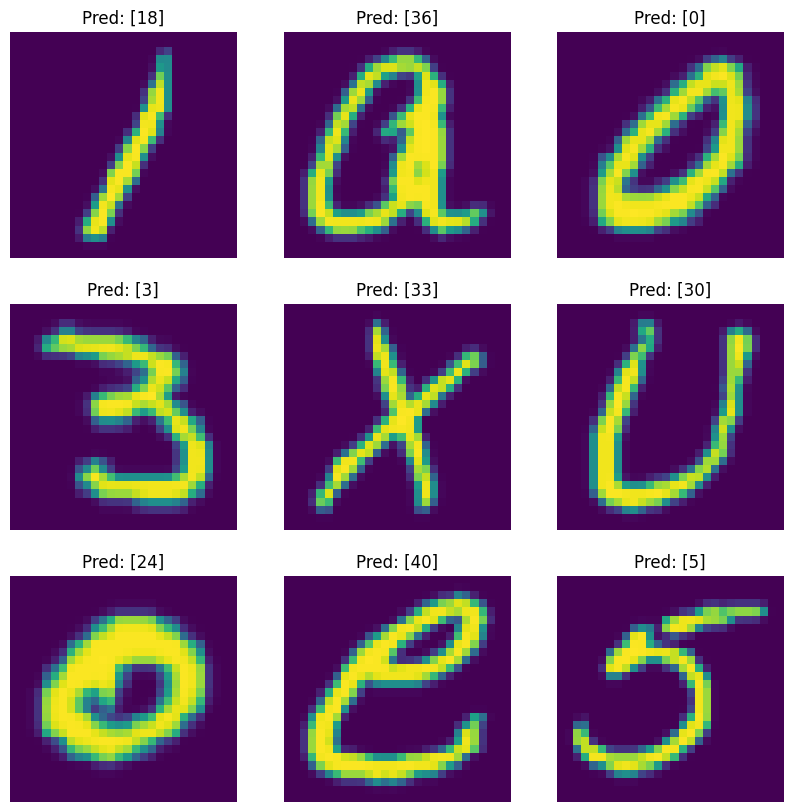

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}')
    plt.axis("off")
    

In [9]:
no_classes=len(np.unique(y_train))
print(no_classes)

62


In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(6, (4, 4), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, (4,4), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(120,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(no_classes, activation='softmax',kernel_initializer = 'he_uniform')    
    
])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 6)      │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25, 25, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 16)       │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9, 9, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       102,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │         7,502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,364 (845.17 KB)

 Trainable params: 216,320 (845.00 KB)

 Non-trainable params: 44 (176.00 B)

In [13]:
batch_size=128
epochs=15
history= model.fit(x_train, y_train,  batch_size,epochs,validation_data=(x_test,y_test))

Epoch 1/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 254s 46ms/step - accuracy: 0.6568 - loss: 1.2147 - val_accuracy: 0.8319 - val_loss: 0.4757
Epoch 2/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 247s 45ms/step - accuracy: 0.8066 - loss: 0.5729 - val_accuracy: 0.8443 - val_loss: 0.4350
Epoch 3/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 249s 46ms/step - accuracy: 0.8182 - loss: 0.5242 - val_accuracy: 0.8485 - val_loss: 0.4181
Epoch 4/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 250s 46ms/step - accuracy: 0.8258 - loss: 0.4974 - val_accuracy: 0.8480 - val_loss: 0.4147
Epoch 5/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 256s 47ms/step - accuracy: 0.8287 - loss: 0.4830 - val_accuracy: 0.8511 - val_loss: 0.4097
Epoch 6/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 259s 48ms/step - accuracy: 0.8336 - loss: 0.4700 - val_accuracy: 0.8516 - val_loss: 0.4074
Epoch 7/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 270s 49ms/step - accuracy: 0.8358 - loss: 0.4625 - val_accuracy: 0.8548 - val_loss: 0.3900
Epoch 8/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 349s 64ms/step - accuracy: 

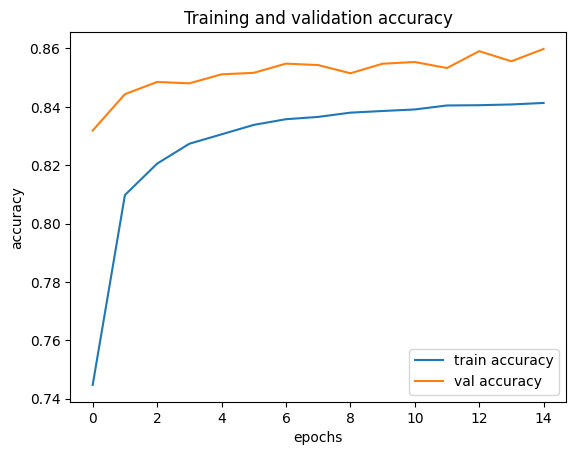

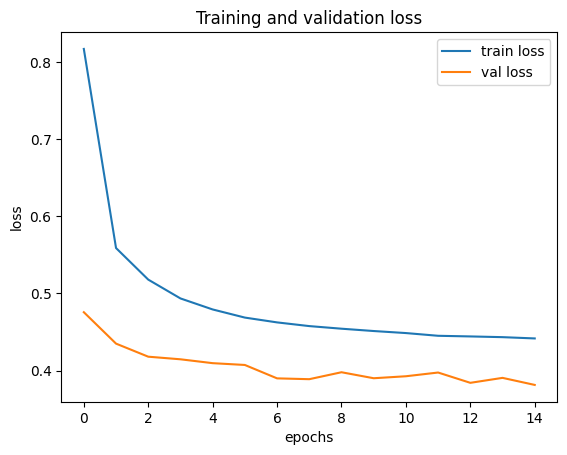

In [15]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [16]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

909/909 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8599 - loss: 0.3843
85.98299622535706


In [17]:
predict=model.predict(x_test)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step


In [18]:
predicted_labels = np.argmax(predict, axis=1)

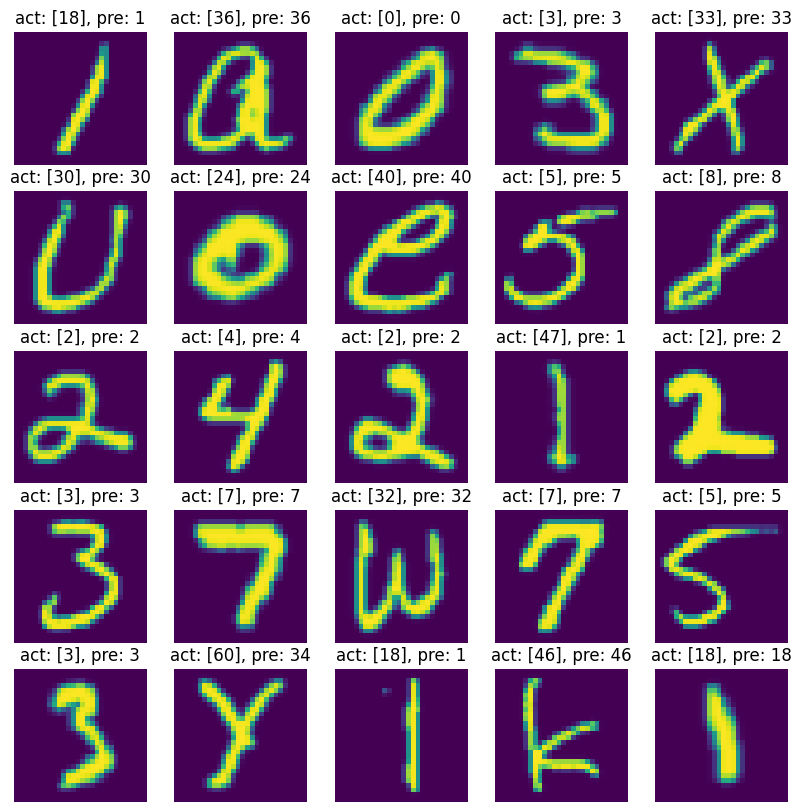

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'act: {y_test[i]}, pre: {predicted_labels[i]}')
    plt.axis("off")

In [25]:
filepath = 'model1_saved.h5'
save_model(model, filepath)